In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
session = Session(engine)

# Exploratory Climate Analysis

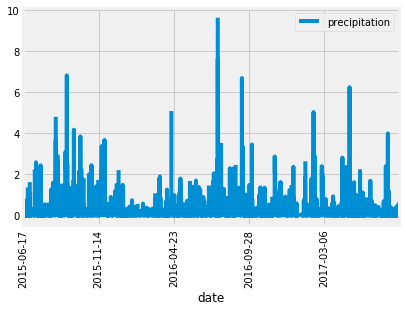

In [7]:
prev_year = dt.date(2016, 6, 16) - dt.timedelta(days=365)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

df = df.sort_index()

df.plot(rot=90)

In [8]:
df.describe()

,precipitation
count,4469.000000
mean,0.202408
std,0.517521
min,0.000000
25%,0.000000
50%,0.020000
75%,0.160000
max,9.640000


In [9]:
session.query(func.count(Station.station)).all()

[(9)]

In [10]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [11]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519397').all()

[(56.0, 87.0, 74.55323054331865)]

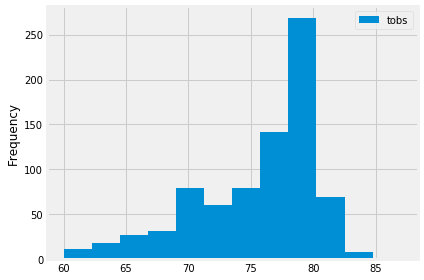

In [12]:
import datetime as dt
from pandas.plotting import table
prev_year = dt.date(2016, 6, 16) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519397').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [13]:
def calc_temps(start_date, end_date):
   
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2016-06-06', '2016-06-12'))

[(69.0, 74.82222222222222, 80.0)]


In [14]:
import datetime as dt

prev_year_start = dt.date(2016, 6, 6) - dt.timedelta(days=365)
prev_year_end = dt.date(2016, 6, 12) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

66.0 74.4888888888889 80.0


C:\Users\Sam\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


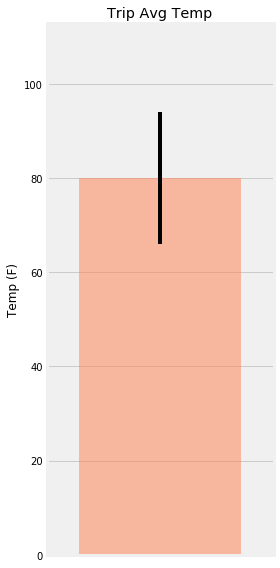

In [15]:
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
# fig.autofmt_xdate()
fig.tight_layout()
fig.show()